In [23]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [24]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate= 1e-3
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [25]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])


In [26]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


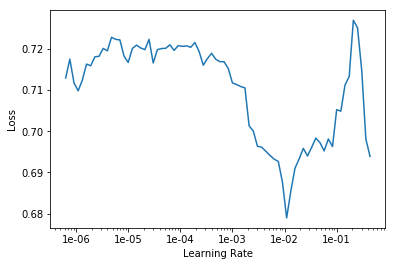

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:31
epoch  train_loss  valid_loss  accuracy
1      0.667288    0.704885    0.328185  (00:08)
2      0.662956    0.966527    0.664093  (00:07)
3      0.647047    0.949429    0.664093  (00:07)
4      0.616523    0.874762    0.664093  (00:07)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:10
epoch  train_loss  valid_loss  accuracy
1      0.618565    0.944489    0.444015  (00:18)
2      0.483432    0.459619    0.810811  (00:24)
3      0.460879    0.418009    0.849421  (00:23)
4      0.510624    0.429489    0.776062  (00:18)
5      0.513440    0.614970    0.714286  (00:18)
6      0.431580    1.076638    0.664093  (00:22)
7      0.385361    0.298739    0.876448  (00:23)
8      0.408327    0.429202    0.799228  (00:18)
9      0.365487    1.455343    0.432432  (00:21)
10     0.391975    0.470605    0.749035  (00:18)
11     0.410791    0.611510    0.683398  (00:24)
12     0.409672    0.453384    0.810811  (00:22)
13     0.361784    3.271912    0.664093  (00:23)
14     0.333867    0.365461    0.864865  (00:21)
15     0.361618    0.330617    0.868726  (00:18)
16     0.303550    0.525692    0.791506  (00:24)
17     0.235027    0.511794    0.826255  (00:24)
18     0.284611    0.392641    0.864865  (00:20)
19     0.193942    0.420346    0.861004  (00:24)
20     0.26

In [31]:
learn.validate()

[0.3170886, tensor(0.8687)]

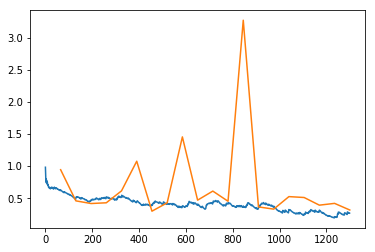

In [32]:
learn.recorder.plot_losses()

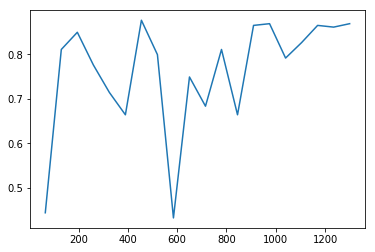

In [33]:
learn.recorder.plot_metrics()

In [34]:
import torch

torch.cuda.empty_cache()